In [1]:
import pandas as pd

df = pd.read_csv("owid_climate_data.csv")
df = df.dropna(subset=["co2", "temperature"])
df.head()

,country,year,co2,temperature
0,Australia,1990,18.72,0.62
1,Australia,1991,8.27,0.80
2,Australia,1992,3.24,0.71
3,Australia,1993,9.87,0.80
4,Australia,1994,3.05,0.72


In [2]:
# Unique countries
unique_countries = set(df['country'])
print(len(unique_countries))  # Should be 10

# Filter function
def get_country_data(df, country, start_year, end_year):
    return df[(df['country'] == country) & (df['year'] >= start_year) & (df['year'] <= end_year)]

result = get_country_data(df, "India", 2000, 2020)
print(result.head())

10
    country  year    co2  temperature
112   India  2000  11.96         1.03
113   India  2001  10.71         1.13
114   India  2002   5.76         1.04
115   India  2003   9.24         1.15
116   India  2004  16.44         1.15


In [3]:
filtered = df[(df['year'] == 2020) & (df['co2'] > 10)]
print(filtered[['country', 'co2', 'temperature']])

            country    co2  temperature
30        Australia  10.28         1.21
64           Brazil  17.44         1.24
132           India  17.59         1.50
200    South Africa  14.33         1.38
302       Indonesia  15.16         1.41
336  United Kingdom  18.09         1.47


In [4]:
yearly_stats = df.groupby('year')['temperature'].agg(['mean', 'min', 'max'])
print(yearly_stats.tail())

over_1_5 = df[df['temperature'] > 1.5]
prob = len(over_1_5) / len(df)
print("Probability of temperature > 1.5°C:", round(prob * 100, 2), "%")

       mean   min   max
year                   
2019  1.365  1.13  1.52
2020  1.371  1.14  1.53
2021  1.369  1.15  1.56
2022  1.427  1.14  1.62
2023  1.423  1.27  1.55
Probability of temperature > 1.5°C: 2.65 %


In [5]:
unique_combinations = df.groupby(['country', 'year']).size()
print("Total combinations:", len(unique_combinations))

Total combinations: 340


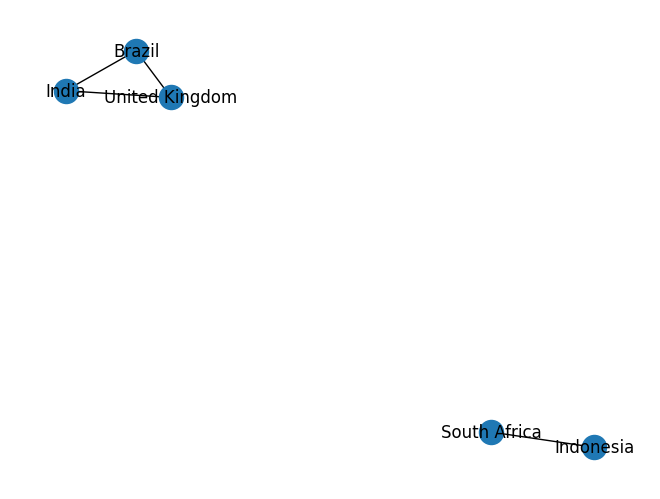

In [6]:
import networkx as nx

G = nx.Graph()
df_2020 = df[df['year'] == 2020]

for i, row1 in df_2020.iterrows():
    for j, row2 in df_2020.iterrows():
        if row1['country'] != row2['country']:
            if abs(row1['co2'] - row2['co2']) < 1.0:
                G.add_edge(row1['country'], row2['country'])

nx.draw(G, with_labels=True)

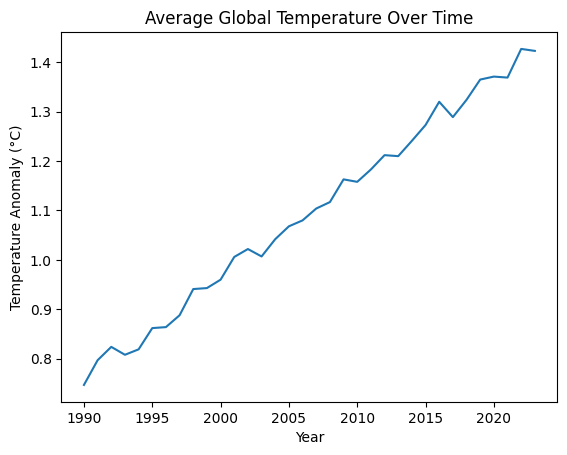

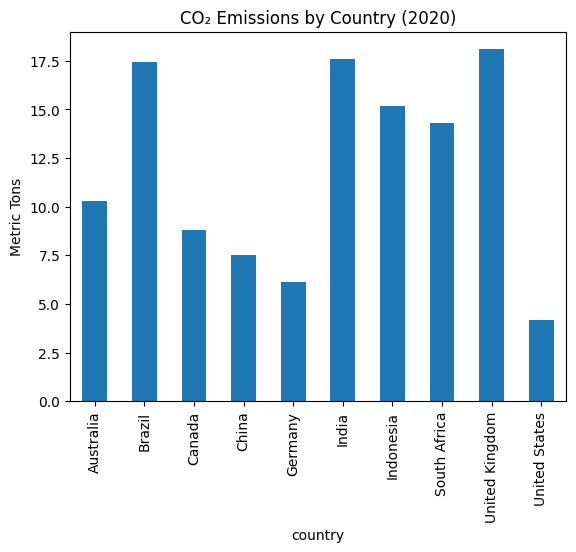

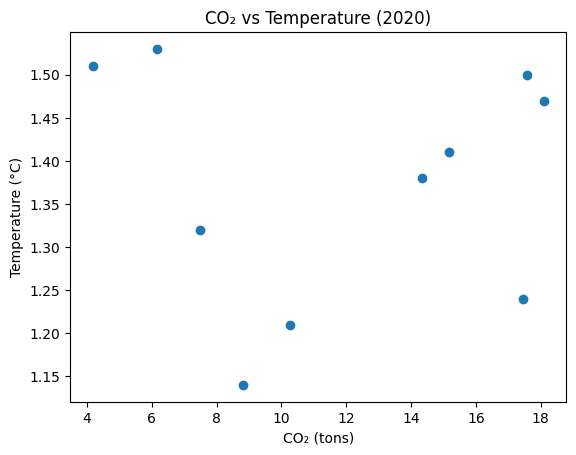

In [7]:
import matplotlib.pyplot as plt

# Line plot of average temp over time
df.groupby('year')['temperature'].mean().plot()
plt.title("Average Global Temperature Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

# Bar chart for 2020 CO2
df_2020 = df[df['year'] == 2020]
df_2020.groupby('country')['co2'].sum().plot(kind='bar')
plt.title("CO₂ Emissions by Country (2020)")
plt.ylabel("Metric Tons")
plt.show()

# Scatterplot
plt.scatter(df_2020['co2'], df_2020['temperature'])
plt.title("CO₂ vs Temperature (2020)")
plt.xlabel("CO₂ (tons)")
plt.ylabel("Temperature (°C)")
plt.show()